In [2]:
import pylab
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from sklearn import linear_model
import statsmodels.api as sm
from scipy import optimize

In [7]:
# numerical integration to find cycles to failure

# Set initial Conditions

deltaAarray = []
w = 0.08 # m
b = w/2
t = 0.002 # m
rho = 0.005 # m
m = 3.59
C0 = 1.42e-11 # m/cycle * (MPa(m**.5))**m
Smax = [315.0,270.0,225.0,315.0,45.0]
Smin = [45.0,45.0,45.0,-65.0,-65.0]
deltaS1 = Smax[0]-Smin[0] # MPa
deltaS2 = Smax[1]-Smin[1] # MPa
deltaS3 = Smax[2]-Smin[2] # MPa
deltaS4 = Smax[3]-Smin[3] # MPa
deltaS5 = Smax[4]-Smin[4] # MPa
R1 = Smin[0]/Smax[0]
R2 = Smin[1]/Smax[1]
R3 = Smin[2]/Smax[2]
R4 = Smin[3]/Smax[3]
R5 = Smin[4]/Smax[4]
gamma1 = 0.680
gamma2 = 0.0 # gamma for R<0 assumed to be 0.0. Multiple values of gamma were tested from 0 < gamma < 1 and
             # found to have no impact on blocks to failure, showing that the R<0 cycles had minimal impact on crack growth.
C1 = (C0/((1-R1)**(m*(1-gamma1))))
C2 = (C0/((1-R2)**(m*(1-gamma1))))
C3 = (C0/((1-R3)**(m*(1-gamma1))))
C4 = (C0/((1-R4)**(m*(1-gamma2))))
C5 = (C0/((1-R5)**(m*(1-gamma2))))
KIc = 34 # MPa * m**0.5
Kc  = 90 # Mpa * m**0.5
a = [.001]
i = 0

ac = 0.019422568022193453              # critical crack lengtj
failure = False
Farray = []
alphaarray = []
def calcdelta(deltaS,R,gamma,C):       # Function to find F, deltaK, dadN, and deltaA
    alpha = a[len(a)-1]/b
    beta = (np.pi*alpha)/2
    F = (np.sqrt(np.tan(beta)/beta))*(1+(0.122*(np.cos(beta))**4))    # Expression for F from fig 8.12 (b)
    Farray.append(F)
    alphaarray.append(alpha)
    deltaK = F*deltaS*np.sqrt(np.pi*a[-1])  # calculate deltaK
    dadN  = C*(deltaK**m)                   # calculate da/dN
    deltaA = dadN*1
    return deltaA

while failure == False:     
    for j in range(len(a)-1,len(a)+14):     # A to B (15 cycles)
        deltaA1 = calcdelta(deltaS1,R1,gamma1,C1) 
        if deltaA1 + a[j] < ac:
            a.append(deltaA1 + a[j])        # add deltaA to last entry in deltaA array
        else:
            failure = True
            break
    if failure == True:
        break
      
    for k in range(len(a)-1,len(a)+39):     # C to B (40 cycles)
        deltaA2 = calcdelta(deltaS2,R2,gamma1,C2)
        if  (deltaA2 + a[k]) < ac:          
            a.append(deltaA2 + a[k])   
        else:
            failure = True
            break
    if failure == True:
        break
        
    for l in range(len(a)-1,len(a)+79):     # D to B (80 cycles)
        deltaA3 = calcdelta(deltaS3,R3,gamma1,C3)
        if  (deltaA3 + a[l]) < ac:
            a.append(deltaA3 + a[l])   
        else:
            failure = True
            break
    if failure == True:
        break
    
    deltaA4 = calcdelta(deltaS4,R4,gamma2,C4) # A to E (1 cycle)
    if  (deltaA4 + a[len(a)-1]) < ac:
        a.append(deltaA4 + a[len(a)-1])   
    else:
        failure = True
        break
        
    deltaA5 = calcdelta(deltaS5,R5,gamma2,C5) # B2 to E (1 cycle)
    if  (deltaA5 + a[len(a)-1]) < ac:
        a.append(deltaA5 + a[len(a)-1])   
    else:
        failure = True
        break
        
    i = i+1
    
print(i)
print(a[-1])
print(len(a))

44
0.01939693217112357
6069


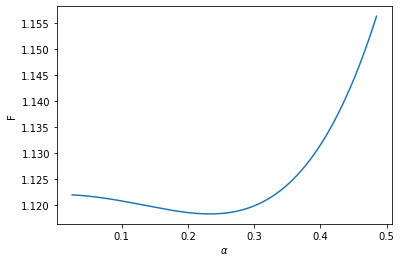

In [8]:
plt.plot(alphaarray,Farray)
plt.xlabel(r'$\alpha$')
plt.ylabel('F')
plt.savefig('problem2Fplot')

In [187]:
print(deltaS1,deltaS2,deltaS3,deltaS4,deltaS5)

270.0 225.0 180.0 380.0 110.0


In [186]:
print(C1,C2,C3,C4,C5)

1.6951058251472865e-11 1.7508613661312624e-11 1.834926054396439e-11 7.24102622925363e-12 5.737484550627416e-13


In [185]:
print(R1,R2,R3,R4,R5)


0.14285714285714285 0.16666666666666666 0.2 -0.20634920634920634 -1.4444444444444444


In [184]:
min(Farray)

1.1182315435722778

In [183]:
print(gamma1,gamma2)

0.68 0.0


In [5]:
# determine critical crack length

def f(a):
    Kc = 90
    alpha = a/b
    beta = (np.pi*alpha)/2
    F = (np.sqrt(np.tan(beta)/beta))*(1+(0.122*(np.cos(beta))**4)) 
#     F = 1.122
    return (F*315.0*np.sqrt(np.pi*a))-Kc
af = optimize.brentq(f,0.0001, .03, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
af[0]



0.019422568022193453